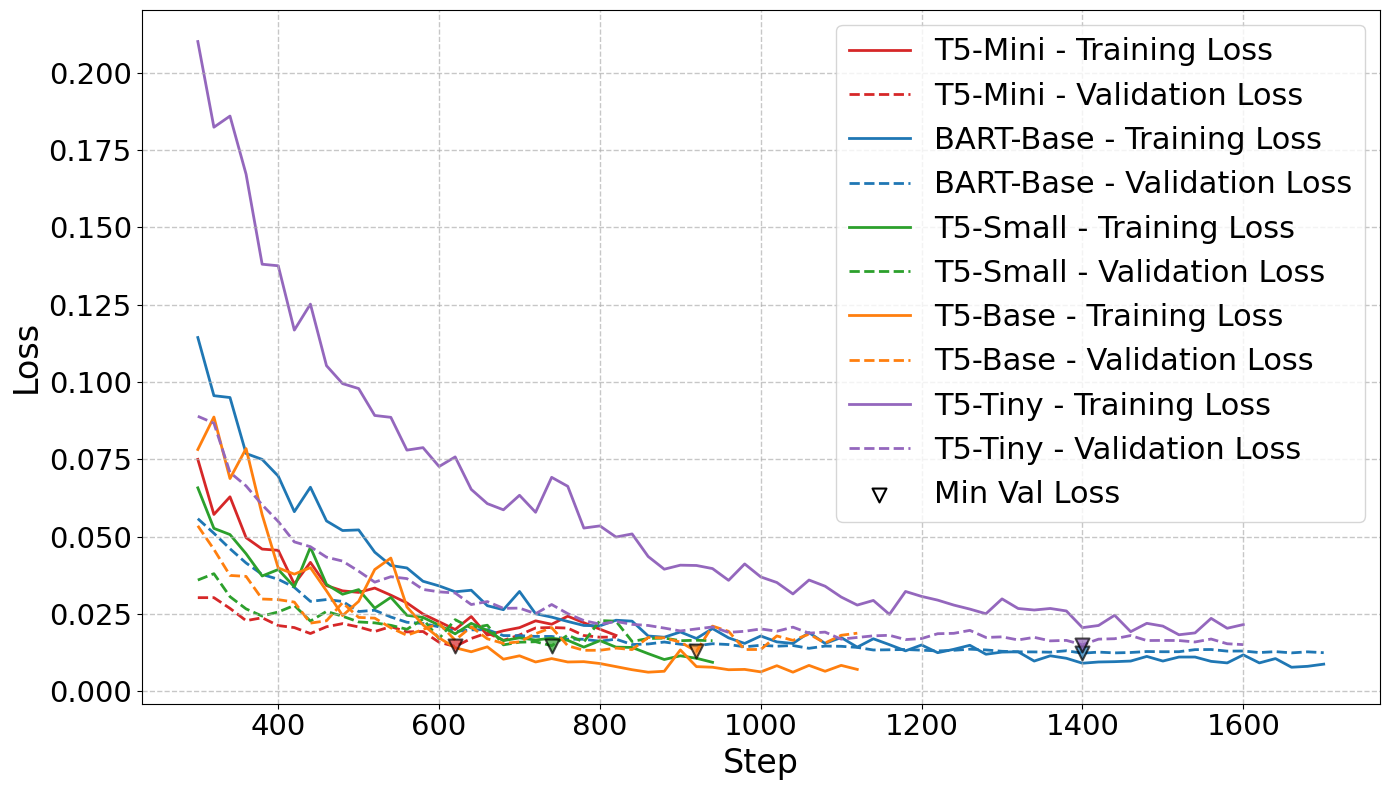

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel 파일 로드
file_path = 'training_loss.xlsx'
data = pd.read_excel(file_path, header=[0, 1])  # 첫번째 행은 모델, 두번째 행은 속성

# Step이 300 이상인 데이터만 선택
limit = 300

# 모델별로 Step, Training Loss, Validation Loss 컬럼 추출
models = list(set([col[0] for col in data.columns if 'Step' in col[1]]))

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 8))

# 색상 설정 (필요한 색상 수만큼 확장 가능)
colors = ['#d62728', '#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#17becf', '#bcbd22']

# 각 모델에 대해 Training Loss와 Validation Loss를 플롯
for i, model in enumerate(models):
    # 모델별로 Step, Training Loss, Validation Loss 데이터 추출
    steps = data[(model, 'Step')]
    training_loss = data[(model, 'Training Loss')]
    validation_loss = data[(model, 'Validation Loss')]
    
    # Step이 300 이상인 데이터만 필터링
    steps_filtered = steps[steps >= limit]
    training_loss_filtered = training_loss[steps >= limit]
    validation_loss_filtered = validation_loss[steps >= limit]
    
    # Training Loss는 실선, Validation Loss는 점선으로 플롯 (각 모델에 대해 다른 색상 사용)
    ax1.plot(steps_filtered, training_loss_filtered, label=f'{model} - Training Loss', color=colors[i % len(colors)], linestyle='-', linewidth=2, zorder=1)
    ax1.plot(steps_filtered, validation_loss_filtered, label=f'{model} - Validation Loss', color=colors[i % len(colors)], linestyle='--', linewidth=2, zorder=1)
    
    # 가장 작은 Validation Loss 지점에 마크 표시 (역삼각형, 투명도 추가, 테두리 추가, zorder 높게 설정)
    min_val_loss_idx = validation_loss_filtered.idxmin()
    min_step = steps_filtered.loc[min_val_loss_idx]
    min_val_loss = validation_loss_filtered.loc[min_val_loss_idx]
    
    # 역삼각형 마커에 테두리 추가 및 zorder 설정
    ax1.scatter(min_step, min_val_loss, color=colors[i % len(colors)], marker='v', s=100, alpha=0.7, edgecolors='black', linewidth=1.5, zorder=3)

# 공통의 범례 항목으로 흰색 역삼각형 표시 추가
ax1.scatter([], [], color='white', marker='v', s=100, edgecolors='black', linewidth=1.5, label='Min Val Loss', zorder=3)

# X축과 Y축 그리드 추가
ax1.grid(True, which='both', linestyle='--', linewidth=1.0, alpha=0.7)

# 글자 크기 조정
ax1.set_xlabel('Step', fontsize=24)
ax1.set_ylabel('Loss', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=21)

# 범례 설정
ax1.legend(loc='upper right', fontsize=22)

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()
